In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement
import pandas as pd

In [2]:
#PROCESOS DE MARKOV: EJERCICIO 2

In [3]:
#a) Cada estado observable es la estación en la que esta el producto: en producción, empaque o en el mercado

In [4]:
#b) El conjunto de estados es:
ConjuntoEstados = {0:"Produccion", 1:"Empaque", 2:"Mercado"}

In [5]:
#c)
T = np.array([[0.1, 0.9, 0.0],
              [0.0, 0.05, 0.95],
              [0.0, 0.0, 1.]])

In [6]:
#d)
pi = np.array([1., 0., 0.])
states = np.array([pi])
for i in range(100):
    pi = np.dot(pi,T)
    states = np.vstack((states,pi))
    if states[i-1] is states[i]:
        break
        
print("El estado estable es:")
pi

El estado estable es:


array([1.0e-100, 1.8e-099, 1.0e+000])

In [7]:
#La interpretación es que el estado estable es aquel en el que todos los productos terminan en el mercado

In [8]:
#e) La probabilidad que haya productos tanto en producción como en empaque es la intersección.
# En un estado estable, esto es igual al producto:
P_ambas = pi[0]*pi[1]
print(f"La probabilidad en estado estable de que ambas estaciones estén ocupadas al mismo tiempo es P={round(P_ambas,2)}")

La probabilidad en estado estable de que ambas estaciones estén ocupadas al mismo tiempo es P=0.0


In [9]:
#f) La probabilidad de que una estación esté ocupada es la unión
# En une estado estable, esto es igual a la suma:
P_alguna = pi[0] + pi[1]
print(f"La  probabilidad  en  estado  estable  de  que  al  menos  una  estacion  este ocupada es P={round(P_alguna,2)}")


La  probabilidad  en  estado  estable  de  que  al  menos  una  estacion  este ocupada es P=0.0


In [10]:
#g) La probabilidad de que producción esté vacía es la probabilidad que esté en otro estado: Osea, la suma de las otras P.
P_prodnovacia = pi[1] + pi[2]
print(f"La probabilidad en estado estable de que la estacion de produccion este vacia es P={round(P_prodnovacia,5)}")


La probabilidad en estado estable de que la estacion de produccion este vacia es P=1.0


In [11]:
#PROCESOS DE MARKOV: EJERCICIO 3

In [12]:
#a) Cada estado observable es, como antes, la estación en la que esta el producto: en producción, empaque o en el mercado

In [13]:
#b) El conjunto de estados es:
ConjuntoEstados = {0:"Produccion", 1:"Empaque", 2:"Mercado"}

In [14]:
#c) La matriz de transición está dada por:
T3 = np.array([[0.1, 0.9, 0.0],
              [0.0, 0.05, 0.95],
              [0.02, 0.0, 0.98]])

In [15]:
#d)
pi3 = np.array([1., 0., 0.])
states3 = np.array([pi3])
for i in range(100):
    pi3 = np.dot(pi3,T3)
    states3 = np.vstack((states,pi3))
    if states3[i-1] is states3[i]:
        break
        
print("El estado estable es:")
pi3

El estado estable es:


array([0.02130045, 0.02017937, 0.95852018])

In [16]:
#Hay que aplicar los mismos razonamientos que en el punto 2:

In [17]:
#e)
P_ambas3 = pi3[0]*pi3[1]
print(f"La probabilidad en estado estable de que ambas estaciones estén ocupadas al mismo tiempo es P={round(P_ambas3*100, 3)}%")

La probabilidad en estado estable de que ambas estaciones estén ocupadas al mismo tiempo es P=0.043%


In [18]:
#f)
P_alguna3 = pi3[0] + pi3[1]
print(f"La  probabilidad  en  estado  estable  de  que  al  menos  una  estacion  este ocupada es P={round(P_alguna3*100, 2)}%")

La  probabilidad  en  estado  estable  de  que  al  menos  una  estacion  este ocupada es P=4.15%


In [19]:
#g)
P_prodnovacia3 = pi3[1] + pi3[2]
print(f"La probabilidad en estado estable de que la estacion de produccion este vacia es P={round(P_prodnovacia3*100,2)}%")

La probabilidad en estado estable de que la estacion de produccion este vacia es P=97.87%


In [20]:
#HIDDEN MARKOV MODELS: EJERCICIO 1
#a)
priori = np.array([0.2,0.8])
T = np.array([[0.8, 0.2], 
              [0.2, 0.8]])
E = np.array([[0.5, 0.9], 
              [0.5, 0.1]])
Estados = np.array([0,1])
DictHidden = {0:'J',1:'B'}
DictObservado = {0:'C',1:'S'}
#b)
ObservadoSimbolo = ["S","C","C","C","S","C","S","C"]
Observado = [1, 0, 0, 0, 1, 0, 1, 0]

def GetStates(State,N):
    CStates = list(combinations_with_replacement(State,N))
    Permu = []
    for it in CStates:
      p = list(permutations(it,N))
      for i in p:
        if i not in Permu:
          Permu.append(i)
    CStates = np.array(Permu)
    return CStates

Ocultos = GetStates(Estados, 8)

def GetProb(T,E,Obs,State,Prior):

  n = len(Obs)
  p = 1.
  # Probabilidad a priori
  p *= Prior[State[0]] #State[0] es el primer estado oculto en la cadena (0 o 1)

  for i in range(n-1): # El ultimo no va a ningun lado (se empezó con el prior)
    p *= T[State[i+1], State[i]] #La fila es el estado al que llego, la columna del que salgo.

  for i in range(n): #Para este NO hay prior, solo para los estados ocultos
    p *= E[ Obs[i], State[i] ] 

  return p

ProbabilidadesOcultos = np.zeros(Ocultos.shape[0])

for i in range(ProbabilidadesOcultos.shape[0]):
  ProbabilidadesOcultos[i] = GetProb(T, E, Observado, Ocultos[i], priori) 
  #Probabilidades de todos los estados ocultos posibles para lo observado

IndiceMasProbable = np.where(ProbabilidadesOcultos == np.max(ProbabilidadesOcultos))
OcultoMasProbable = []
for ind in Ocultos[IndiceMasProbable][0]:
  OcultoMasProbable.append(DictHidden[ind])
print(f"La secuencia oculta más probable para {Observado} es {OcultoMasProbable} con probabilidad {round(ProbabilidadesOcultos[IndiceMasProbable][0],6)}")

La secuencia oculta más probable para [1, 0, 0, 0, 1, 0, 1, 0] es ['B', 'B', 'B', 'B', 'J', 'J', 'J', 'J'] con probabilidad 0.000191


In [21]:
#c)
Secuencias = []
for i in range(Ocultos.shape[0]):
    secuencia = [DictHidden[state] for state in Ocultos[i]]
    Secuencias.append(",".join(secuencia))

df = pd.DataFrame({
    "Secuencia": Secuencias,
    "Probabilidad": ProbabilidadesOcultos
})

# Ordenar el DataFrame por probabilidad de mayor a menor
df = df.sort_values(by="Probabilidad", ascending=False)

# Calcular la probabilidad acumulada
df["Probabilidad Acumulada"] = df["Probabilidad"].cumsum()

# Filtrar secuencias cuya probabilidad acumulada sea <= 20%
df_filtrado = df[df["Probabilidad Acumulada"] <= 0.20]
print(df_filtrado)

           Secuencia  Probabilidad  Probabilidad Acumulada
162  B,B,B,B,J,J,J,J  1.911030e-04                0.000191
0    J,J,J,J,J,J,J,J  1.638400e-04                0.000355
92   B,B,B,J,J,J,J,J  1.061683e-04                0.000461
255  B,B,B,B,B,B,B,B  9.906778e-05                0.000560
215  B,B,B,B,J,J,J,B  8.599634e-05                0.000646
..               ...           ...                     ...
76   B,J,J,J,B,J,B,J  5.120000e-09                0.001934
190  B,J,B,J,B,J,B,B  4.147200e-09                0.001934
61   J,B,J,J,B,J,B,J  2.880000e-09                0.001934
51   J,J,B,J,B,J,B,J  2.880000e-09                0.001934
142  B,J,B,J,B,J,B,J  5.760000e-10                0.001934

[256 rows x 3 columns]


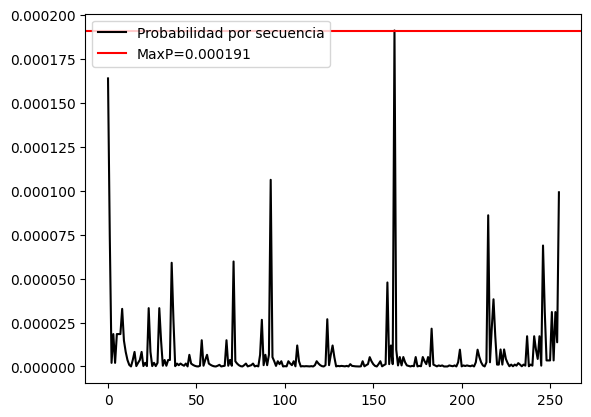

In [22]:
#d)
plt.plot(range(len(Ocultos)), ProbabilidadesOcultos, color="k", label ="Probabilidad por secuencia")
plt.axhline(0.000191, color="red", xmin=0, xmax=len(Ocultos), label="MaxP=0.000191")
plt.legend()

In [23]:
#e)
EstadosObservables= GetStates([0,1],8) #Todos los estados OBSERVABLES POSIBLES
NumeroObservables = EstadosObservables.shape[0]
ProbabilidadObservables = np.zeros(NumeroObservables)

for j in range(NumeroObservables):
  dim = Ocultos.shape[0] #Todos los estados observables de 3 tienen los mismos estados ocultos posibles
  P = np.zeros(dim)
  for i in range(dim):
    P[i] = GetProb(T,E,EstadosObservables[j],Ocultos[i],priori)

  ProbabilidadObservables[j] = np.sum(P) #La suma de las probabilidades de todos los estados ocultos es la probabilidad del estado observable
ProbabilidadObservables

array([0.13698241, 0.04114921, 0.0347373 , 0.03175272, 0.03026766,
       0.02932288, 0.02830811, 0.02656789, 0.02297818, 0.01870516,
       0.01330002, 0.01467809, 0.01079433, 0.01067359, 0.01276253,
       0.00956961, 0.00877661, 0.00936674, 0.01172117, 0.00883478,
       0.00776184, 0.00767971, 0.00853533, 0.01088136, 0.00811519,
       0.00697382, 0.00661175, 0.00679511, 0.00764233, 0.00970066,
       0.00694603, 0.00590355, 0.00547305, 0.00537647, 0.00555143,
       0.00611094, 0.0074164 , 0.00955193, 0.00649319, 0.00616157,
       0.00733671, 0.00505945, 0.00428819, 0.00497251, 0.00456283,
       0.0048075 , 0.00623446, 0.00432462, 0.00337544, 0.00382959,
       0.00321043, 0.00330316, 0.00416108, 0.00372302, 0.00355961,
       0.00405611, 0.00553322, 0.00381405, 0.00283376, 0.00316972,
       0.00249084, 0.00251514, 0.00309313, 0.00256378, 0.00241017,
       0.0026765 , 0.00353481, 0.00309969, 0.00278698, 0.0028754 ,
       0.00342205, 0.00478004, 0.00319794, 0.00231328, 0.00256

Text(0.5, 1.0, 'Probabilidad de cada secuencia observable')

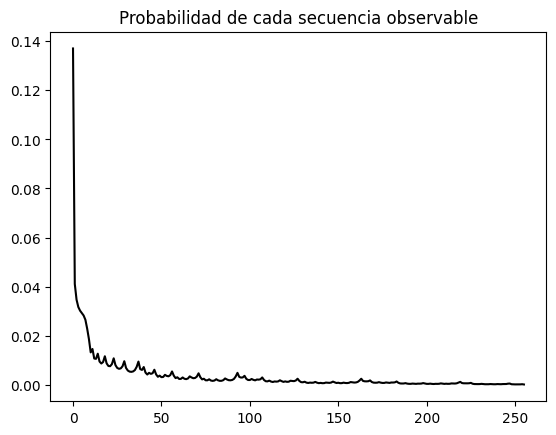

In [24]:
plt.plot(range(NumeroObservables), ProbabilidadObservables, color="k")
plt.title("Probabilidad de cada secuencia observable")

In [25]:
#f)
print(f"La suma de probabilidad de todos los estados observables es {np.sum(ProbabilidadObservables)}")

La suma de probabilidad de todos los estados observables es 1.0000000000000007


In [26]:
#g) Depende de sobre que resultado estamos hablando. Para f), no importa la probabilidad a priori, la suma de prob
# de todos los estados observables SIEMPRE es 1, ya que el modelo de Markov oculto es siempre bien definido.
# sin embargo, las respuestas de los otros incisos si cambia, ya que la probabilidad a Priori cambia la probabilidad
# de cada secuencia oculta asociada a cada secuencia observable. Por ejemplo, con una probabilidad a priori 0.5-0.5
# la secuencia oculta asociada a b) más probable es todas J. Y así cambia cada secuencia observable. Por lo tanto,
# las gráficas cambian y los resultados de los otros puntos también.

In [27]:
#h) Dado que es un modelo oculto de Markov, el modelo de aprendizaje automático más robusto sería uno basado en
# el algoritmo de Baum-Welch. 
#PASO 1: Definiría mi modelo oculto de Markov como en el problema. Es decir, los estados ocultos B y J,
#        los estados observables C y S, la probabilidad a priori de cada estado oculto y UN GUESS de las P
#        en las matrices de emisión y transición.
#PASO 2 (Expectación): Estimaría las probabilidades de cada secuencia oculta en base al modelo definido en el paso 1
#                      mediante el algoritmo de retroceso y hacia adelante. Estos consisten en lo siguiente:
#           RETROCESO: estimo las probabilidades de las secuencias OBSERVABLES FUTURAS dado el estado actual
#           ADELANTE: la probabilidad de ver los estados observables en el presente y estar en el estado actual.
#                     Este se basaría en un proceso recursivo
#PASO 3 (Maximización): con las probabilidades sacadas en el paso 2, actualizo las matrices de E y T:
#             Matriz T: Se actualiza Tij utilizando la probabilidad CONJUNTA de estar en el estado i 
#                       en el tiempo t y de hacer la transición al estado j en el tiempo t+1 usando
#                       los teoremas de probabilidad aprendidos en clase.
#             Matriz E: Se actualiza Eij sumando la probabilidad de estar en el estado i y de haber observado k.
#PASO 4: Como con todos los procesos de optimización, se realiza este proceso varias veces hasta que los parametros 
#        en E y T convergan o se alcance un numero maximo de iteraciones. Lógicamente, las probabilidades en el paso 1
#        para E y T son las calculadas en la iteración anterior.
#Así se pueden estimar las entradas de las matrices E y T. Es un modelo de aprendizaje porque 1) no es supervisado
# y 2) el algoritmo aprende que los parametros que estima son correctos si tiende a converger.